# In this notebook we will condunct a sentiment analysis on Elon Musk related tweets. 
In order to be able to achieve that we already applied for an Academic Research License on Twitter and after many attemps we succeded in obtaining one.

# 1. Required libraries

In the list below, the python libraries that are needed in order to conduct Donald Trump's tweets sentiment analysis are presented and their use is explained.

1. Re →  for cleaning the tweets
2. NLTK →  for removing stop words
3. Numpy →  for processing images
4. Pandas →  for handling extracted data
5. Textblob →  for sentiment analysis
6. Wordcloud →  for plotting word cloud
7. Tweepy →  for Twitter API authorization and extracting tweets from it
8. Matplotlib →  for visualization.

In [1]:
import re
import nltk
import tweepy
import numpy as np
import pandas as pd
from textblob import TextBlob
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import json
import seaborn as sb


# 2. Load the already gathered data

The data is obtained in a two-step process:
1. Running the data_scrape.py python script, the tweets are gathered and saved under the "Raw" folder as .json files
2. The tweets are cleared using cleaning_data.ipynb Jupyter Notebook which eliminates the components from a tweet that are not relevant to the sentiment Analysis such as: hashtags, mentions, external links. Afterwards, the two data sets are saved under "Clean" folder from this repository as .csv files.

Why the data is not gathered by connecting directly to Twitter API in this notebook and why the data sets are loaded from "Clean" folder?
1. Twitter API might crash at that particular moment when this notebook will be runned again.
2. In order to protect the Twitter API token and secret from malicious intent, because after all, this repository is public.
3. Because of the performance, the overall runtime of this notebook is drastically improved by 5 to 10 minutes. 

If it is wished to reproduce the process of the two obtained datasets, the process is the following:
1. Run data_scape.ipynb Jupyter Notebook -> It connects to the Twitter API and exports the optained data to folder "Raw" as .json files
2. Run cleaning_data.ipynb Jupyter Notebook -> It gathers from the "Raw" folder the datasets which are as .json files and cleans them, e.g. without hashtags, exporting them under the folder "Clean" as .csv files which will be used in the notebooks responsible for the sentiment analysis. 

In [2]:
# Creating the dataframes
df_before = pd.read_csv("Clean/clean_before_Elon_Musk.csv")
df_after = pd.read_csv("Clean/clean_after_Elon_Musk.csv")

# 3. Calculating the subjectivity and polarity of tweets. 

1. What is Subjectivity and how you measure it?

The subjectivity is nothing but a sentence that expresses some personal feelings, views, or beliefs. Its values range from 0 to 1 where 0 is very objective and 1 is very subjective.

2. What is Polarity and how you measure it?

Polarity means emotions expressed in a sentence. Its value ranges from -1 to 1, where -1 represents the most negative comment and 1 represent the most positive comment.

# 3.1. Subjectivity and Polarity of Elon Musk related tweets before Elon Musk alongside with a test list of only five tweets from the whole data set:

In [3]:
# Subjectivity before Elon Musk
def subj(tweet):
    return TextBlob(tweet).sentiment.subjectivity
 
# Polarity before Elon Musk
def pol(tweet):
    return TextBlob(tweet).sentiment.polarity
 
df_before['Subjectivity'] = df_before.Tweets.apply(subj)
df_before['Polarity'] = df_before.Tweets.apply(pol)

df_before.head(100)

,Unnamed: 0,Tweets,Subjectivity,Polarity
0,0,: “I was concerned because I saw Biden talking...,0.000000,0.000000
1,1,"This is her totally, keep vigilant 🙏🏻",0.750000,0.000000
2,2,The corruption is so obvious at this point -...,0.650000,-0.400000
3,3,"How does McConnell keep getting elected, es...",1.000000,0.000000
4,4,"If true, why ?",0.650000,0.350000
...,...,...,...,...
95,95,1 _4_zion 4 1 The German word is made up of ...,0.200000,0.000000
96,96,: has more than 10 BILLION synthetic shares s...,0.272222,0.086111
97,97,We no longer have real journalists within th...,0.300000,0.200000
98,98,🧐 plans to launch ? \n\nSo let us guess wha...,0.400000,0.312500


# 3.2. Subjectivity and Polarity of Elon Musk related tweets after Elon Musk alongside with a test list of only five tweets from the whole data set

In [4]:
# Subjectivity after Elon Musk
def subj(tweet):
    return TextBlob(tweet).sentiment.subjectivity
 
# Polarity after Elon Musk
def pol(tweet):
    return TextBlob(tweet).sentiment.polarity
 
df_after['Subjectivity'] = df_after.Tweets.apply(subj)
df_after['Polarity'] = df_after.Tweets.apply(pol)

df_after.head(100)

,Unnamed: 0,Tweets,Subjectivity,Polarity
0,0,182 376 You don't have to be 'sticking up' f...,1.000000,-1.000000
1,1,Of course you can.,0.000000,0.000000
2,2,@240gordymacd 1 Yeah yeah. I’m sure you be...,0.888889,0.500000
3,3,more gaslighting...,0.500000,0.500000
4,4,Yes and Quickly!!!!,0.500000,0.813802
...,...,...,...,...
95,95,You lied to state officials across the count...,0.288889,-0.155556
96,96,2 1 Like every other small business owner?,0.387500,-0.187500
97,97,3Owners Nutmeg is looking FABULOUS today!,1.000000,0.500000
98,98,What Elon exposed shows no sign of interfere...,0.000000,0.000000


# 4. Classifying the obtained Elon Musk related tweets from the two dataframes: before and after Elon Musk.

The Elon Musk related tweets are classified into three different sentiment classes which are: Positive, Negative, Neutral.

# 4.1. Clasification of Elon Musk related tweets alongside with a mock-up test list of only five tweets from the dataset, before Elon Musk.

In [5]:
# Sentiment (polarity)
def sentiment(polarity):
    result = ''
    if polarity < 0:
        result = 'Negative'
    elif polarity > 0:
        result = 'Positive'
    else:
        result = 'Neutral'
    return result
 
df_before['Sentiment'] = df_before.Polarity.apply(sentiment)
df_before.head(100)

,Unnamed: 0,Tweets,Subjectivity,Polarity,Sentiment
0,0,: “I was concerned because I saw Biden talking...,0.000000,0.000000,Neutral
1,1,"This is her totally, keep vigilant 🙏🏻",0.750000,0.000000,Neutral
2,2,The corruption is so obvious at this point -...,0.650000,-0.400000,Negative
3,3,"How does McConnell keep getting elected, es...",1.000000,0.000000,Neutral
4,4,"If true, why ?",0.650000,0.350000,Positive
...,...,...,...,...,...
95,95,1 _4_zion 4 1 The German word is made up of ...,0.200000,0.000000,Neutral
96,96,: has more than 10 BILLION synthetic shares s...,0.272222,0.086111,Positive
97,97,We no longer have real journalists within th...,0.300000,0.200000,Positive
98,98,🧐 plans to launch ? \n\nSo let us guess wha...,0.400000,0.312500,Positive


# 4.2. Clasification of Elon Musk related tweets alongside with a mock-up test list of only five tweets from the dataset, after Elon Musk.

In [6]:
# Sentiment (polarity)
def sentiment(polarity):
    result = ''
    if polarity < 0:
        result = 'Negative'
    elif polarity > 0:
        result = 'Positive'
    else:
        result = 'Neutral'
    return result
 
df_after['Sentiment'] = df_after.Polarity.apply(sentiment)
df_after.head(100)

,Unnamed: 0,Tweets,Subjectivity,Polarity,Sentiment
0,0,182 376 You don't have to be 'sticking up' f...,1.000000,-1.000000,Negative
1,1,Of course you can.,0.000000,0.000000,Neutral
2,2,@240gordymacd 1 Yeah yeah. I’m sure you be...,0.888889,0.500000,Positive
3,3,more gaslighting...,0.500000,0.500000,Positive
4,4,Yes and Quickly!!!!,0.500000,0.813802,Positive
...,...,...,...,...,...
95,95,You lied to state officials across the count...,0.288889,-0.155556,Negative
96,96,2 1 Like every other small business owner?,0.387500,-0.187500,Negative
97,97,3Owners Nutmeg is looking FABULOUS today!,1.000000,0.500000,Positive
98,98,What Elon exposed shows no sign of interfere...,0.000000,0.000000,Neutral


# 5. Representing through different types of plots the ratio of the sentiment

# 5.1. Direct comparison of the ratio of the sentiment between before and after Elon Musk of himself related tweets using bar plots.

1. The first bar plot represents the sentiment clasification of Elon Musk related tweets before Elon Musk became the CEO of Twitter.
2. The second bar plot represents the sentiment clasification of Elon Musk related tweets before Elon Musk became the CEO of Twitter.

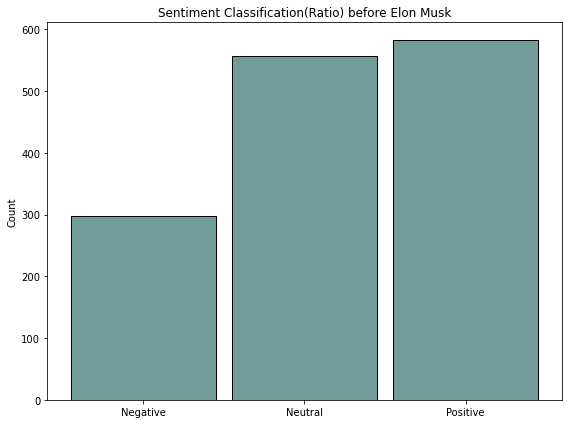

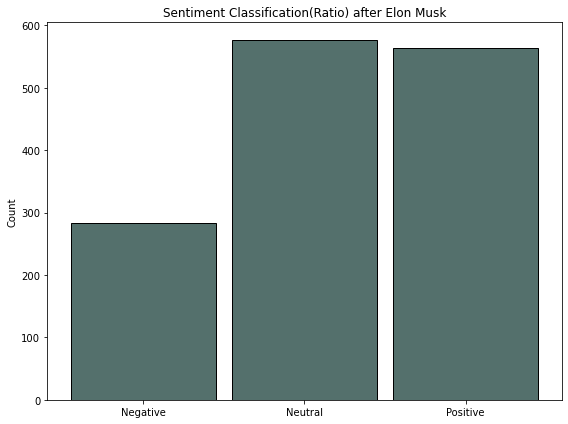

In [7]:
#The ratio of the sentiment before Elon Musk
f1 = plt.figure(figsize = (8,6))
sb.histplot(df_before.sort_values(by=['Sentiment']), x = 'Sentiment', color = '#417D7A', shrink = 0.9).set(xlabel = None)
plt.title('Sentiment Classification(Ratio) before Elon Musk')
plt.ylim(0, 700)
plt.tight_layout()


#The ratio of the sentiment after Elon Musk
f2 = plt.figure(figsize = (8,6))
sb.histplot(df_after.sort_values(by=['Sentiment']), x = 'Sentiment', color = '#1B403B', shrink = 0.9).set(xlabel = None)
plt.title('Sentiment Classification(Ratio) after Elon Musk')
plt.ylim(0, 700)
plt.tight_layout()

f1.savefig("Images/BeforeMuskBar.pdf", bbox_inches='tight')
f2.savefig("Images/AfterMuskBar.pdf", bbox_inches='tight')

# 5.2. Subjectivity vs Polarity

In this chapter, the comparison will be represented through scatter plots of both acts: before and after Elon Musk.


First of all, the comparison will be done individually: one plot for "before Elon Musk" and one plot for "after Elon Musk".

Second, the comparison will be done directly in the same scatter plot between the two states: "before" and "after" of Elon Musk related tweets.

# 5.2.1. Subjectivity vs Polarity represented in a scatter plot before Elon Musk.

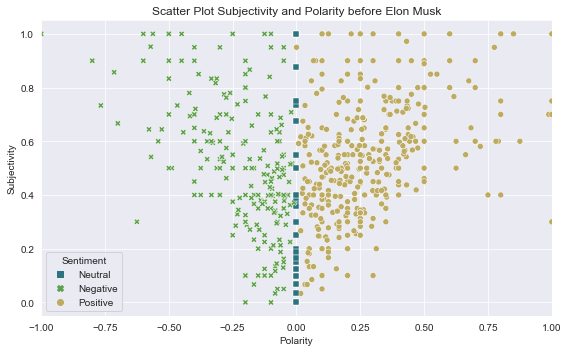

In [8]:
#Subjectivity vs Polarity in a scatter plot before Elon Musk
sb.set_style('darkgrid')
plt.figure(figsize = (8,5))
markers = {'Positive':'o', 'Neutral':'s','Negative':'X'}
sb.scatterplot(data=df_before, x='Polarity', y='Subjectivity', hue = 'Sentiment', style = 'Sentiment', markers = markers, palette = 'gist_earth').set(xlim=(-1,1))
plt.title('Scatter Plot Subjectivity and Polarity before Elon Musk')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.tight_layout()

# 5.2.2. Subjectivity vs Polarity represented in a scatter plot after Elon Musk.

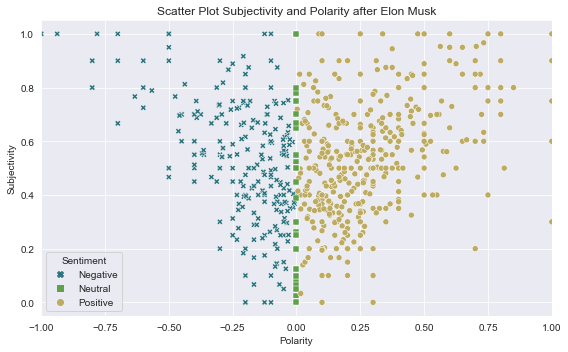

In [9]:
#Subjectivity vs Polarity in a scatter plot after Elon Musk
sb.set_style('darkgrid')
plt.figure(figsize = (8,5))
markers = {'Positive':'o', 'Neutral':'s','Negative':'X'}
sb.scatterplot(data=df_after, x='Polarity', y='Subjectivity', hue = 'Sentiment', style = 'Sentiment', markers = markers, palette = 'gist_earth').set(xlim=(-1,1))
plt.title('Scatter Plot Subjectivity and Polarity after Elon Musk')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.tight_layout()

# 5.2.3. Subjectivity vs Polarity represented in the same scatter plot between: before and after Elon Musk.

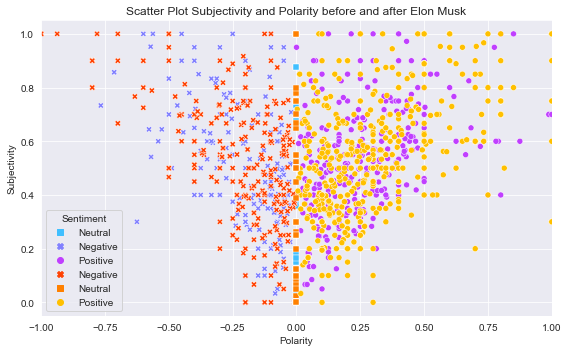

In [10]:
#Subjectivity vs Polarity in a scatter plot before and after Elon Musk
sb.set_style('darkgrid')
plt.figure(figsize = (8,5))
markers = {'Positive':'o', 'Neutral':'s','Negative':'X'}
sb.scatterplot(data=df_before, x='Polarity', y='Subjectivity', hue = 'Sentiment', style = 'Sentiment', markers = markers, palette = 'cool').set(xlim=(-1,1))
sb.scatterplot(data=df_after, x='Polarity', y='Subjectivity', hue = 'Sentiment', style = 'Sentiment', markers = markers, palette = 'autumn').set(xlim=(-1,1))
plt.title('Scatter Plot Subjectivity and Polarity before and after Elon Musk')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.tight_layout()



# 6. The percentage of each sentiment class.

The percentage of each sentiment class for the both scenarios: "before" and "after" is presented indivually and as pie plots.

# 6.1. The percentage of each sentiment class before Elon Musk.


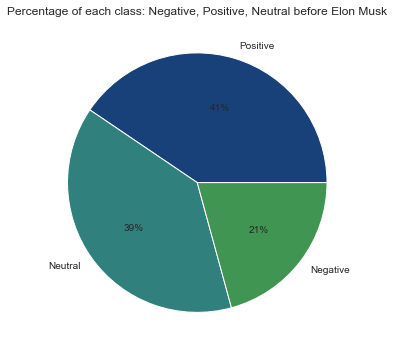

In [11]:
# The percentage of each class: Negative, Positive, Neutral before Elon Musk
 
df_sentiment_before = pd.DataFrame(df_before.Sentiment.value_counts(normalize=True)*100)
df_sentiment_before['Total Before Elon Musk'] = df_before.Sentiment.value_counts()
df_sentiment_before
f1 = plt.figure(figsize = (10, 5))
data = df_before['Sentiment'].value_counts()
colors = sb.color_palette('gist_earth')
labels = ['Positive', 'Neutral', 'Negative']
plt.pie(data, labels = labels, autopct = '%.0f%%', colors = colors)
plt.title('Percentage of each class: Negative, Positive, Neutral before Elon Musk')
plt.tight_layout()

f1.savefig("Images/BeforeMuskPie.pdf", bbox_inches='tight')


# 6.2. The percentage of each sentiment class after Elon Musk.


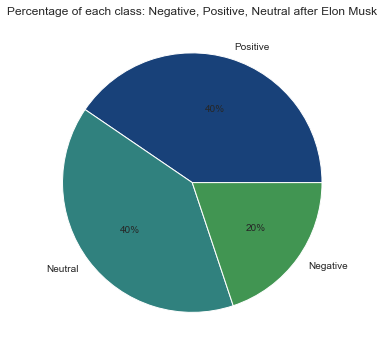

In [12]:
# The percentage of each class: Negative, Positive, Neutral after Elon Musk

df_sentiment_after = pd.DataFrame(df_after.Sentiment.value_counts(normalize=True)*100)
df_sentiment_after['Total After Elon Musk'] = df_after.Sentiment.value_counts()
df_sentiment_after
f2 = plt.figure(figsize = (10, 5))
data = df_after['Sentiment'].value_counts()
colors = sb.color_palette('gist_earth')
labels = ['Positive', 'Neutral', 'Negative']
plt.pie(data, labels = labels, autopct = '%.0f%%', colors = colors)
plt.title('Percentage of each class: Negative, Positive, Neutral after Elon Musk')
plt.tight_layout()

f2.savefig("Images/AfterMuskPie.pdf", bbox_inches='tight')